         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-05-23  1.156429  1.242857  1.145714  1.196429   1.196429  104790000
1  2002-05-24  1.214286  1.225000  1.197143  1.210000   1.210000   11104800
2  2002-05-28  1.213571  1.232143  1.157143  1.157143   1.157143    6609400
3  2002-05-29  1.164286  1.164286  1.085714  1.103571   1.103571    6757800
4  2002-05-30  1.107857  1.107857  1.071429  1.071429   1.071429   10154200
5  2002-05-31  1.078571  1.078571  1.071429  1.076429   1.076429    8464400
(4945, 7)


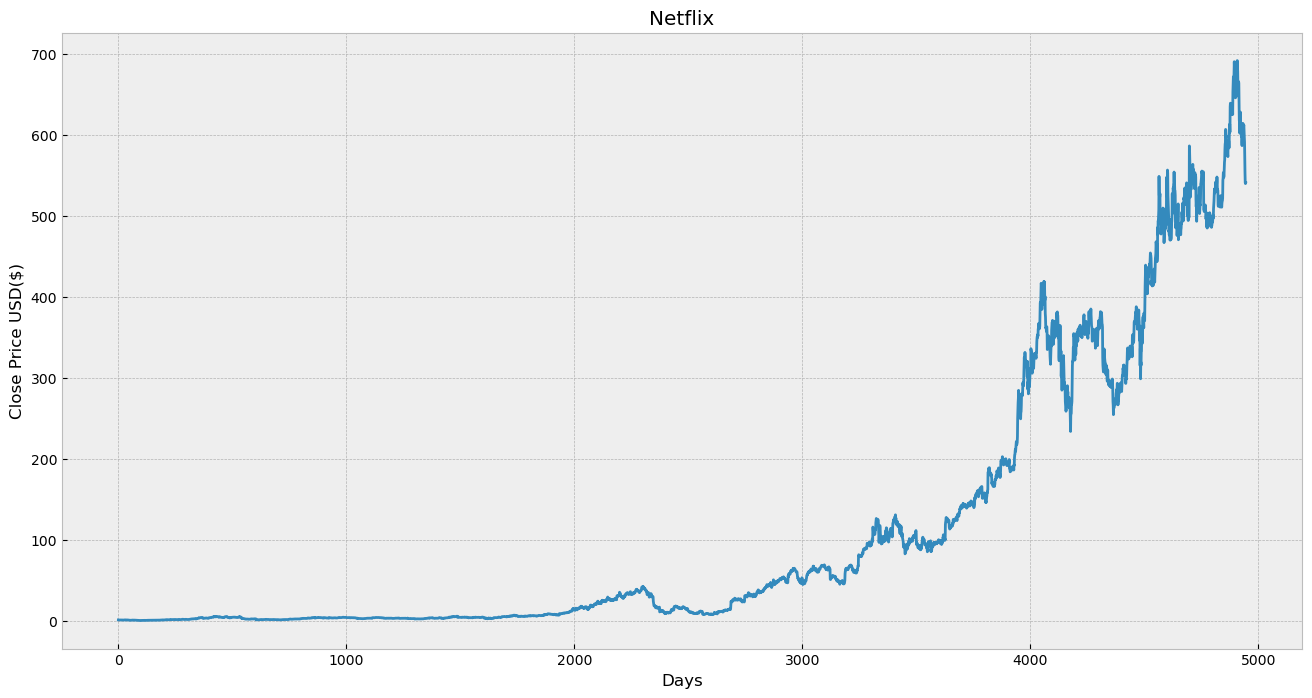

      Close
0  1.196429
1  1.210000
2  1.157143
3  1.103571
      Close  Prediction
0  1.196429    0.775000
1  1.210000    0.760714
2  1.157143    0.793571
3  1.103571    0.796429
           Close  Prediction
4941  553.289978         NaN
4942  541.059998         NaN
4943  539.849976         NaN
4944  540.840027         NaN
[[  1.196429]
 [  1.21    ]
 [  1.157143]
 ...
 [662.919983]
 [674.049988]
 [690.309998]]
[  0.775      0.760714   0.793571 ... 541.059998 539.849976 540.840027]
[[546.880005]
 [553.330017]
 [553.409973]
 [547.580017]
 [550.119995]
 [558.919983]
 [566.179993]
 [569.190002]
 [582.070007]
 [588.549988]
 [590.530029]
 [606.710022]
 [606.049988]
 [597.539978]
 [598.719971]
 [589.289978]
 [577.76001 ]
 [582.869995]
 [586.5     ]
 [589.349976]
 [575.429993]
 [573.140015]
 [590.650024]
 [593.26001 ]
 [592.390015]
 [592.640015]
 [583.849976]
 [599.059998]
 [610.340027]
 [613.150024]
 [603.349976]
 [634.809998]
 [639.099976]
 [631.849976]
 [632.659973]
 [627.039978]
 [624.940

C:\Users\Vidit\AppData\Local\Temp\ipykernel_21260\1341919212.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


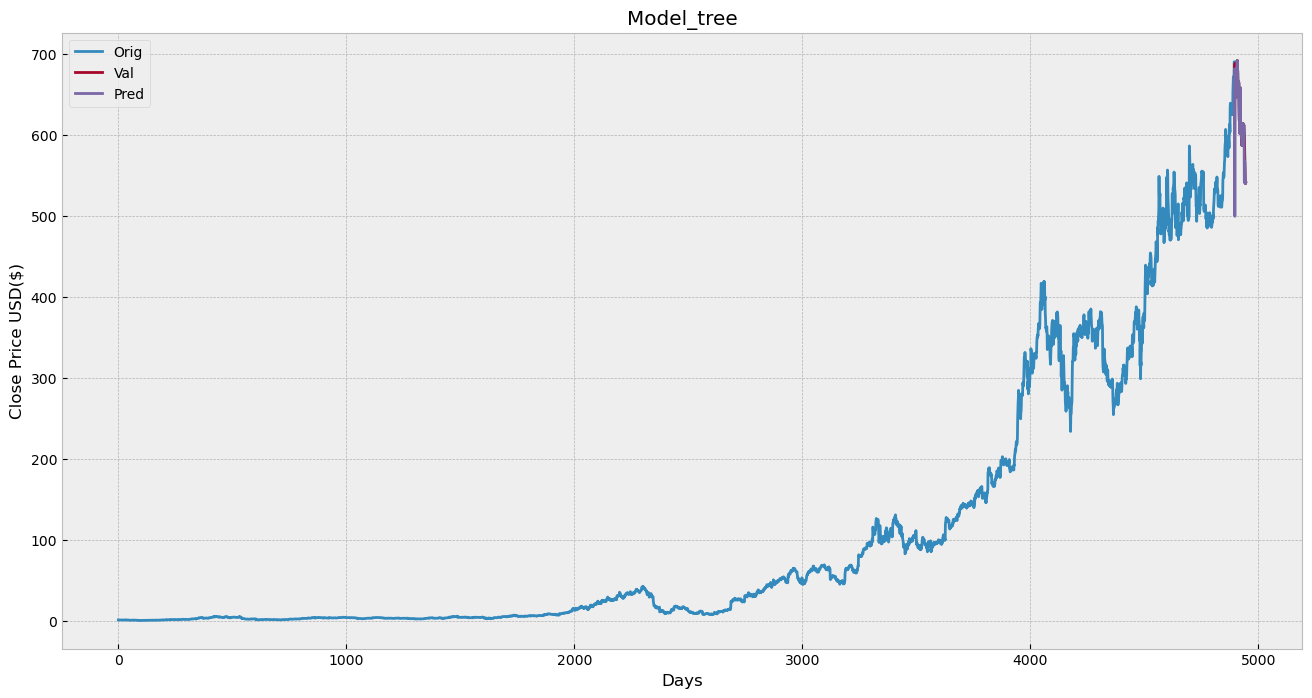

C:\Users\Vidit\AppData\Local\Temp\ipykernel_21260\1341919212.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction'] = Predictions


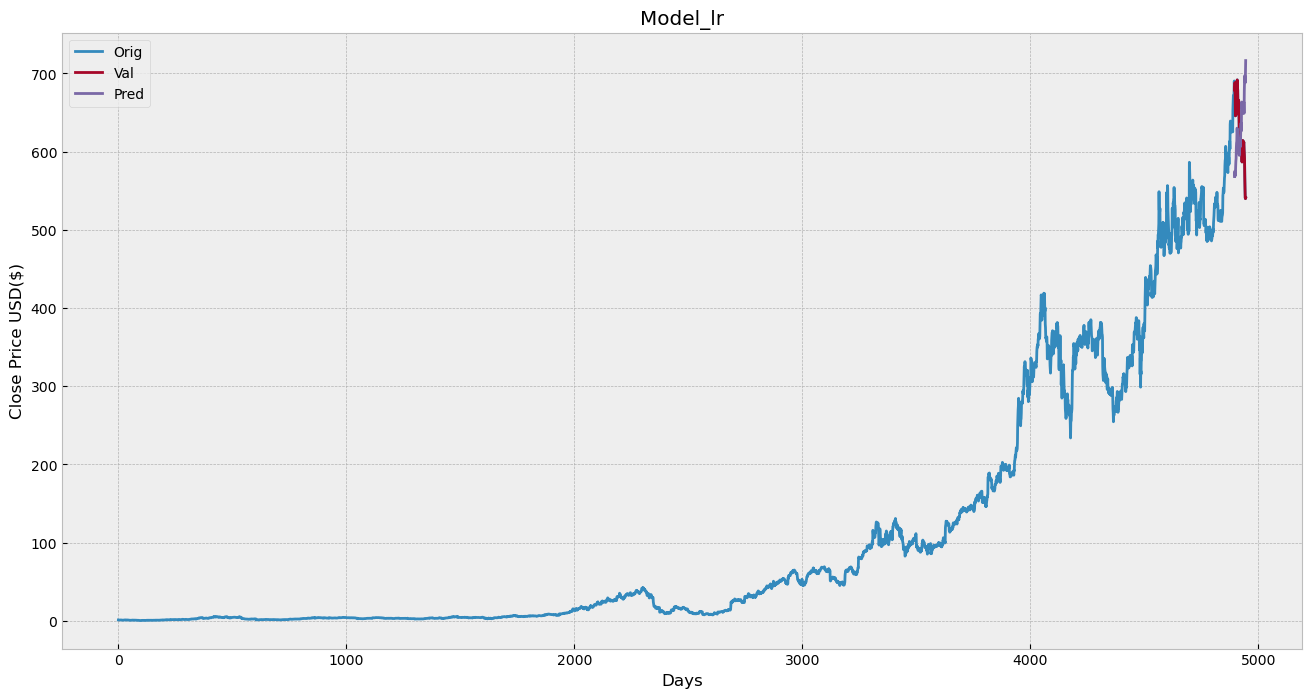

In [33]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

df =pd.read_csv('NFLX.csv')
print(df.head(6))
print(df.shape)

plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.show()

df = df[['Close']]
print(df.head(4))

future_days = 50
df['Prediction'] = df[['Close']].shift(-future_days)
print(df.head(4))
print(df.tail(4))


x = np.array(df.drop(['Prediction'], axis=1))[:-future_days]
print(x)

y = np.array(df['Prediction'])[:-future_days]
print(y)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

tree = DecisionTreeRegressor().fit(x_train, y_train)

lr = LinearRegression().fit(x_train, y_train)

x_future = df.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
print(x_future)

tree_prediction = tree.predict(x_future)
print(tree_prediction)
print ()

lr_prediction = lr.predict(x_future)
print(lr_prediction)

Predictions = tree_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_tree')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

Predictions = lr_prediction
valid = df[x.shape[0]:]
valid['Prediction'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model_lr')
plt.xlabel('Days')
plt.ylabel('Close Price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()
